In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df1 = pd.read_csv('./data/labtest1_final.csv')
df1.rename(columns={'Total':'labtest_marks'}, inplace=True)
df1['Name'] = df1['Name'].str.replace(' .', '')
df2 = pd.read_csv('./data/cp_midsem_final.csv')
df2.rename(columns={'Marks':'midsem_marks'}, inplace=True)
df2['midsem_marks'] = df2['midsem_marks'].fillna(0)
df2['Name'] = df1['Name'].str.replace(' .', '')


/var/folders/vq/pg1xtx713y9dshb3yysyyh3r0000gn/T/ipykernel_48393/1929646919.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Name'] = df1['Name'].str.replace(' .', '')
/var/folders/vq/pg1xtx713y9dshb3yysyyh3r0000gn/T/ipykernel_48393/1929646919.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Name'] = df1['Name'].str.replace(' .', '')


In [11]:
df1

,ID No,Name,Room,Set,Q1,Q2,Q3,labtest_marks
0,2022A1PS0530P,IRAOGRA,6114,PINK,0.0,5.0,10.0,15
1,2022A1PS0589P,ASLESHAMBHALE,6114,PINK,2.0,30.0,25.0,57
2,2022A1PS0593P,AAYUSHASHISHAHESHWARI,6114,PINK,14.0,5.0,2.0,21
3,2022A1PS0643P,SHIVANGUPTA,6114,PINK,20.0,30.0,25.0,75
4,2022A1PS0661P,ARYAMANUBEY,6114,PINK,0.0,0.0,4.0,4
...,...,...,...,...,...,...,...,...
579,2022AAPS0360P,SPARSHHANWAR,6017,Yellow,10.0,0.0,5.0,15
580,2022AAPS0363P,NISHKARSHAIN,6017,Yellow,20.0,35.0,18.0,73
581,2022AAPS0366P,DIWAKARITTAL,6017,Yellow,20.0,35.0,10.0,65
582,2022AAPS0369P,SUBRATOY,6017,Yellow,15.0,4.0,5.0,24


In [12]:
df2

,ID No,Name,midsem_marks
0,2022A1PS0530P,IRAOGRA,12
1,2022A1PS0589P,ASLESHAMBHALE,26
2,2022A1PS0593P,AAYUSHASHISHAHESHWARI,17
3,2022A1PS0643P,SHIVANGUPTA,36
4,2022A1PS0661P,ARYAMANUBEY,14
...,...,...,...
593,2022AAPS0360P,NaN,17
594,2022AAPS0363P,NaN,42
595,2022AAPS0366P,NaN,30
596,2022AAPS0369P,NaN,24


In [7]:
# combine df1 and df2 by adding marks and total column to make new column called total
df = pd.concat([df1, df2], axis=1)
#drop duplicate columns
df = df.loc[:,~df.columns.duplicated()]
df['Marks'] = df['midsem_marks'] + df['labtest_marks']
df['code'] = df['ID No'].str[4:6]
df

TypeError: can only concatenate str (not "float") to str

In [5]:
max_marks = 125

Text(0.5, 1.0, 'Marks Distribution for CP PCT')

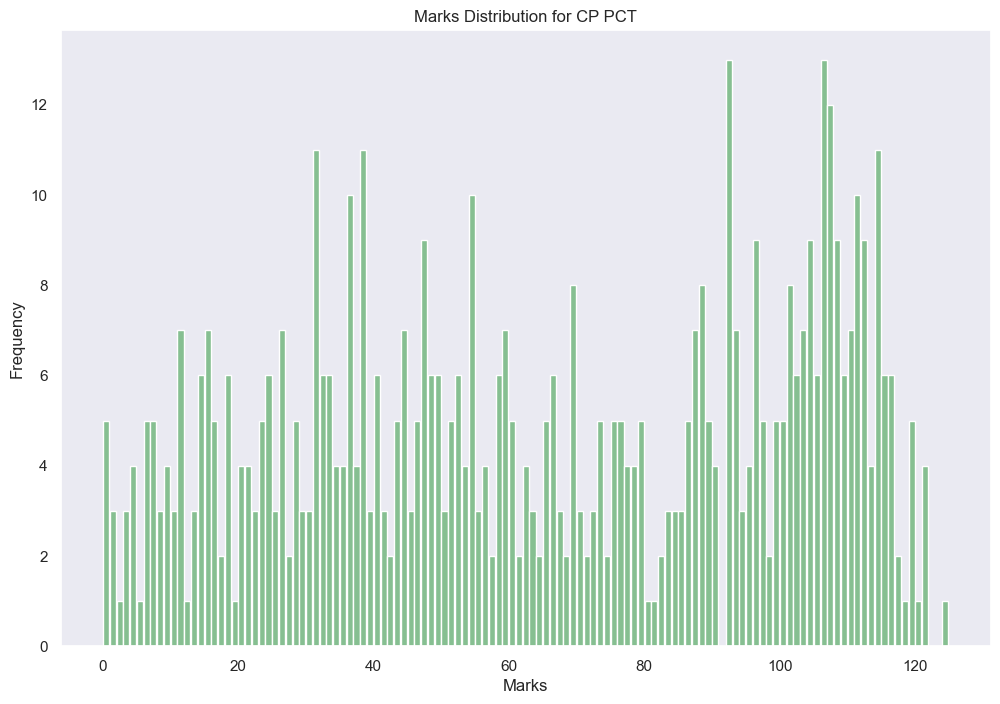

In [6]:
import seaborn as sns
sns.set_theme()

df.hist(column='Marks',bins=max_marks, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Marks Distribution for CP')

In [7]:
print(f"Mean: {df['Marks'].mean()}")
print(f"Median: {df['Marks'].median()}")

64.93383584589614
65.0


In [8]:
stats.percentileofscore(df['Marks'], 75, kind='weak')

57.118927973199334

In [9]:
for i in range(0, 126):
    print(f"marks: {i} -> {stats.percentileofscore(df['Marks'], i, kind='weak')}")

marks: 0 -> 0.8375209380234506
marks: 1 -> 1.340033500837521
marks: 2 -> 1.5075376884422111
marks: 3 -> 2.0100502512562817
marks: 4 -> 2.680067001675042
marks: 5 -> 2.847571189279732
marks: 6 -> 3.6850921273031827
marks: 7 -> 4.522613065326634
marks: 8 -> 5.025125628140704
marks: 9 -> 5.695142378559464
marks: 10 -> 6.197654941373535
marks: 11 -> 7.370184254606365
marks: 12 -> 7.5376884422110555
marks: 13 -> 8.040201005025127
marks: 14 -> 9.045226130653267
marks: 15 -> 10.217755443886098
marks: 16 -> 11.055276381909549
marks: 17 -> 11.390284757118929
marks: 18 -> 12.39530988274707
marks: 19 -> 12.56281407035176
marks: 20 -> 13.23283082077052
marks: 21 -> 13.90284757118928
marks: 22 -> 14.40536013400335
marks: 23 -> 15.242881072026801
marks: 24 -> 16.24790619765494
marks: 25 -> 16.750418760469014
marks: 26 -> 17.922948073701843
marks: 27 -> 18.257956448911223
marks: 28 -> 19.095477386934675
marks: 29 -> 19.597989949748744
marks: 30 -> 20.100502512562816
marks: 31 -> 21.94304857621441
mar

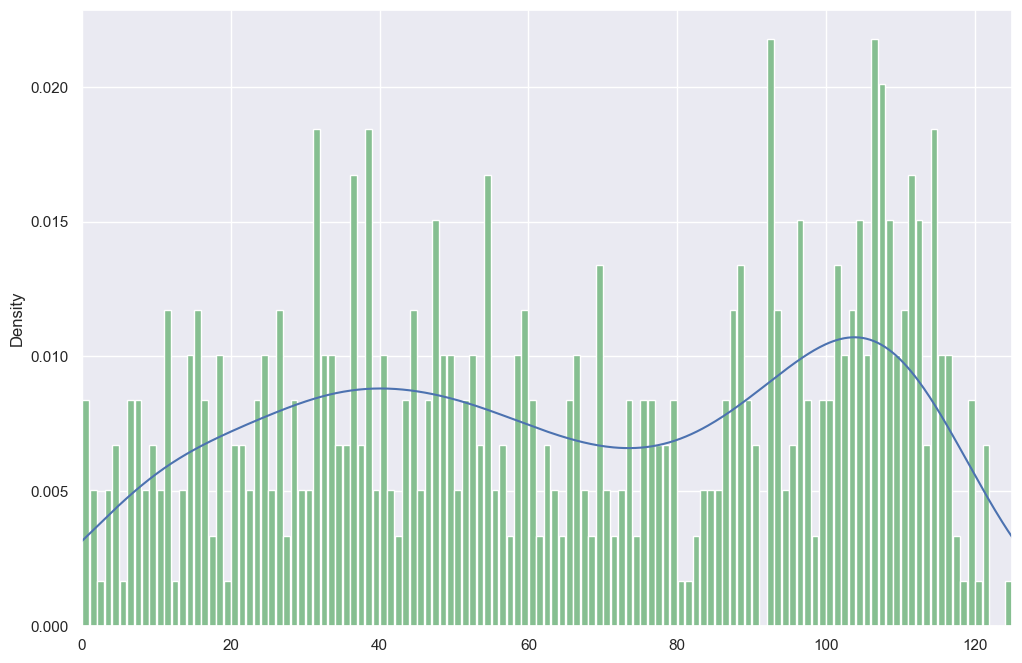

In [48]:
fig, ax = plt.subplots(figsize = (6,4))
df['Marks'].plot(kind = "hist", density=True, bins=max_marks, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df['Marks'].plot(kind = "kde", ax=ax)
ax.set_xlim(0, max_marks)
plt.show()

In [50]:
a7_df = df[df['code'] == 'A7']
a7_df

,ID No,Name,Room,Set,Q1,Q2,Q3,labtest_marks,Unnamed: 8,midsem_marks,Marks,code
310,2022A7PS0001P,KALPANA PANDA .,6017,PINK,14.0,30.0,25.0,69,NaN,34.0,103.0,A7
311,2022A7PS0002P,SAANVI DANDE .,6017,PINK,NaN,NaN,NaN,0,Absent,0.0,0.0,A7
312,2022A7PS0003P,SIDDARTH RAJAGOPALAN .,6017,PINK,20.0,30.0,25.0,75,NaN,37.0,112.0,A7
313,2022A7PS0004P,DEEPAN ROY .,6017,PINK,20.0,30.0,25.0,75,NaN,33.0,108.0,A7
314,2022A7PS0005P,DEVANSH NIKHIL SHAH .,6017,PINK,4.0,0.0,8.0,12,NaN,26.0,38.0,A7
...,...,...,...,...,...,...,...,...,...,...,...,...
467,2022A7PS1186P,SHASHANK JHA .,6117,Yellow,20.0,35.0,7.0,62,NaN,41.0,103.0,A7
468,2022A7PS1187P,HARSIMAR SINGH SALUJA .,6117,Yellow,20.0,35.0,20.0,75,NaN,38.0,113.0,A7
469,2022A7PS1188P,ARMAAN SETHI .,6117,Yellow,20.0,35.0,20.0,75,NaN,34.0,109.0,A7
470,2022A7PS1189P,ARNAV GUPTA .,6117,Yellow,20.0,30.0,10.0,60,NaN,39.0,99.0,A7


array([[<AxesSubplot:title={'center':'Marks'}>]], dtype=object)

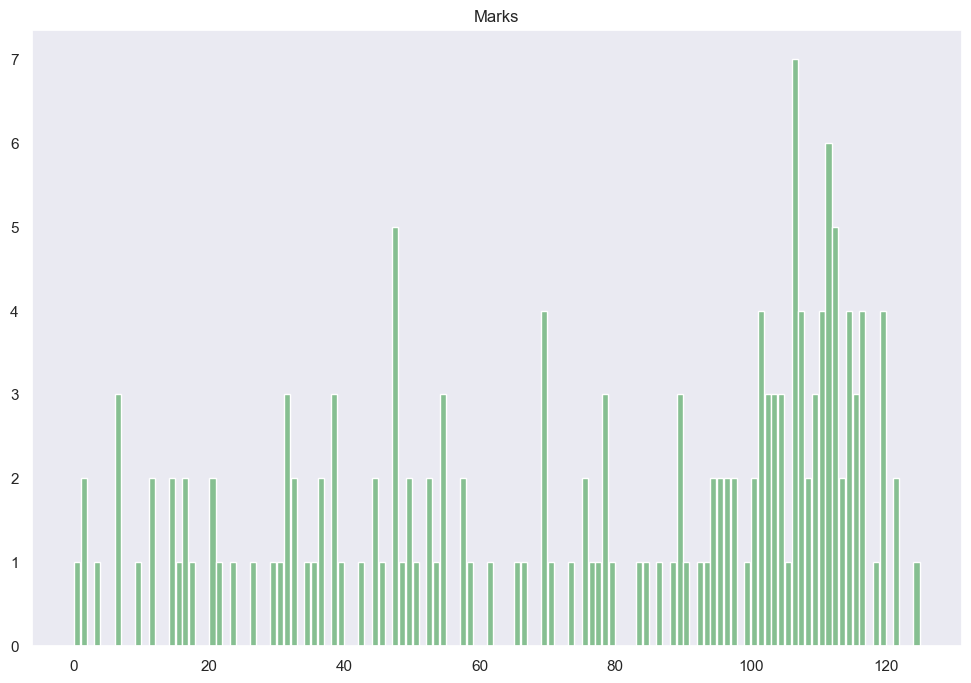

In [51]:
a7_df.hist(column='Marks',bins=max_marks, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [52]:
for i in range(90, 125):
    print(f"marks: {i} -> {stats.percentileofscore(a7_df['Marks'], i, kind='weak')}")

marks: 90 -> 51.23456790123456
marks: 91 -> 51.23456790123456
marks: 92 -> 51.85185185185185
marks: 93 -> 52.46913580246913
marks: 94 -> 53.7037037037037
marks: 95 -> 54.938271604938265
marks: 96 -> 56.172839506172835
marks: 97 -> 57.407407407407405
marks: 98 -> 57.407407407407405
marks: 99 -> 58.02469135802469
marks: 100 -> 59.25925925925925
marks: 101 -> 61.72839506172839
marks: 102 -> 63.58024691358025
marks: 103 -> 65.4320987654321
marks: 104 -> 67.28395061728395
marks: 105 -> 67.90123456790123
marks: 106 -> 72.22222222222221
marks: 107 -> 74.69135802469135
marks: 108 -> 75.92592592592592
marks: 109 -> 77.77777777777777
marks: 110 -> 80.24691358024691
marks: 111 -> 83.9506172839506
marks: 112 -> 87.03703703703704
marks: 113 -> 88.2716049382716
marks: 114 -> 90.74074074074073
marks: 115 -> 92.59259259259258
marks: 116 -> 95.06172839506172
marks: 117 -> 95.06172839506172
marks: 118 -> 95.67901234567901
marks: 119 -> 98.14814814814814
marks: 120 -> 98.14814814814814
marks: 121 -> 99.3

In [53]:
print(a7_df['Marks'].mean())
print(a7_df['Marks'].median())


75.94753086419753
89.0


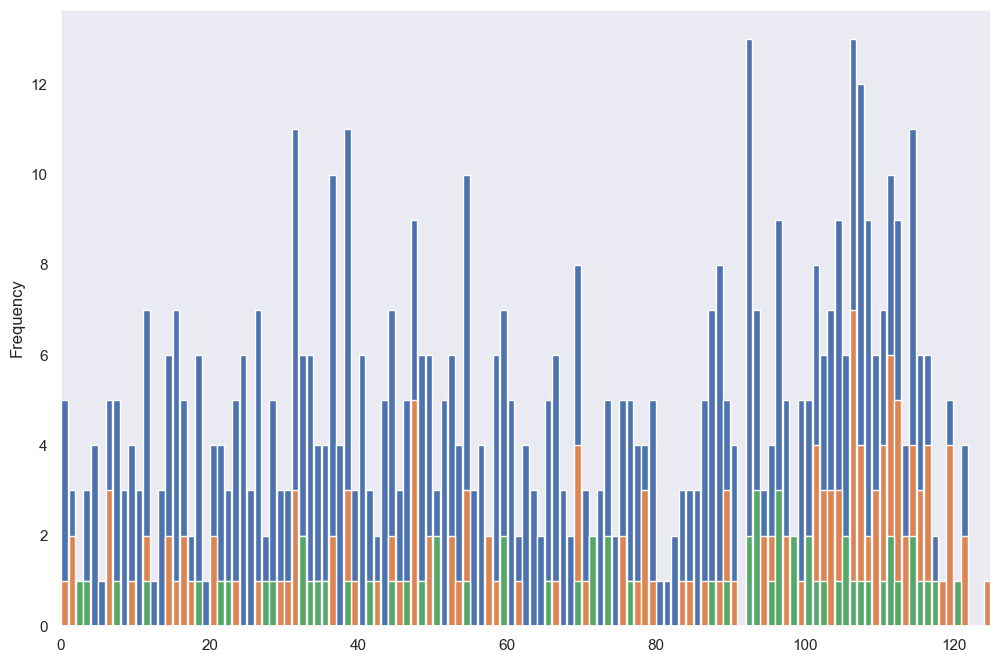

In [58]:
fig, ax = plt.subplots(figsize = (6,4))
df['Marks'].plot(kind = "hist", bins=max_marks, grid=False, figsize=(12,8), zorder=2, rwidth=0.9)
a7_df['Marks'].plot(kind = "hist", bins=max_marks, grid=False, figsize=(12,8), zorder=2, rwidth=0.9)
df[df['code'] == 'AA']['Marks'].plot(kind = "hist", bins=max_marks, range=[0,max_marks], grid=False, figsize=(12,8), zorder=2, rwidth=0.9)
ax.set_xlim(0, max_marks)
plt.show()

<AxesSubplot:>

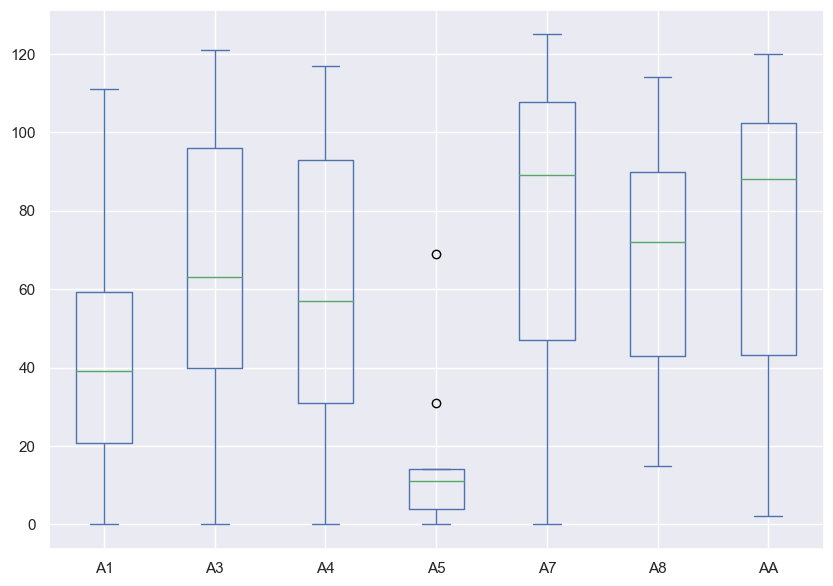

In [59]:
pivot = df.pivot_table(index="ID No", columns='code', values='Marks')
pivot.plot(kind='box', figsize=(10, 7))

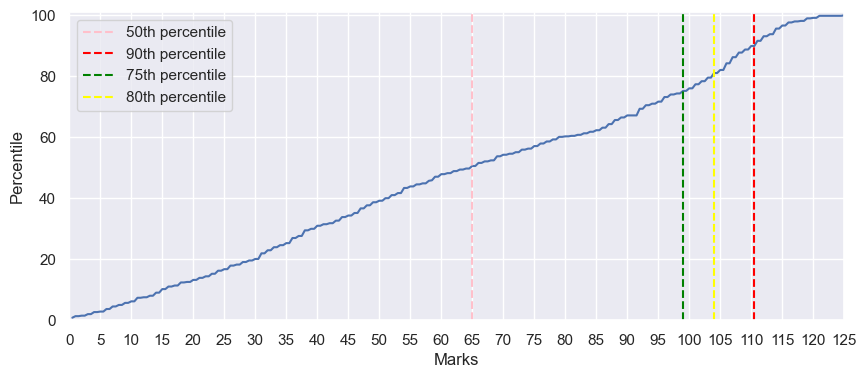

In [62]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10,4))
fun = lambda k: [i/k for i in list(range(1, max_marks*k + 1))]

a = fun(2)
b = [stats.percentileofscore(df["Marks"],i, kind='weak') for i in a]
ax.plot(a, b)

lis = [i for i in range(0, 101)]

plt.axvline(x=df['Marks'].quantile([0.5]).values[0], color='pink', linestyle='--', label='50th percentile')
plt.axvline(x=df['Marks'].quantile([0.9]).values[0], color='red', linestyle='--', label='90th percentile')
plt.axvline(x=df['Marks'].quantile([0.75]).values[0], color='green', linestyle='--', label='75th percentile')
plt.axvline(x=df['Marks'].quantile([0.8]).values[0], color='yellow', linestyle='--', label='80th percentile')



ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_ylim(0,101)
ax.set_xlim(0,max_marks)
ax.set_xlabel("Marks")
ax.set_ylabel("Percentile")
ax.legend()
plt.show()